In [2]:
# Ravikiran S Basutkar ; whatsapp 6300218589

In [27]:
import pandas as pd

In [28]:
data_r=pd.read_csv("data.csv")

In [29]:
data_r.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [30]:
import numpy as np

import matplotlib.pyplot as plt

In [31]:
data_r.describe()


,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [123]:
data_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2227 non-null   float64
 1   x2      2227 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [32]:
data_r.isna().sum()

x1    5
x2    3
y     0
dtype: int64

In [33]:
# Imputating the missing values           
# Mean Imputation - x1,x2 is a continuous data
mean_value_x1 = data_r.x1.mean()
data_r.x1 = data_r.x1.fillna(mean_value_x1)
mean_value_x2 = data_r.x2.mean()
data_r.x2 = data_r.x2.fillna(mean_value_x2)
data_r.isna().sum()

x1    0
x2    0
y     0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x182b7f518e0>,
 'caps': [<matplotlib.lines.Line2D at 0x182b7f51fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x182b7f51550>],
 'medians': [<matplotlib.lines.Line2D at 0x182b7f586a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x182b7f58a00>],
 'means': []}

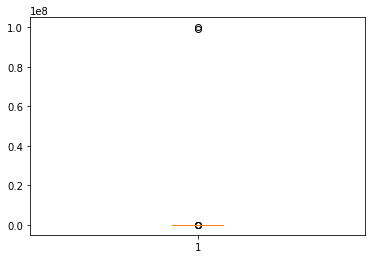

In [34]:
plt.boxplot(data_r.x2)


0

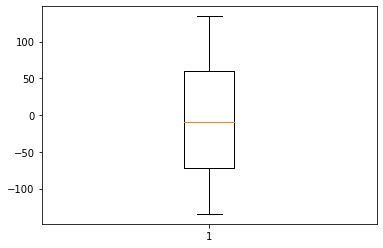

In [35]:
#from Ravi # check how many outliers are present
###########to check number of outliers in each columns
from pylab import *
rrg = boxplot(data_r.x1)
top_points_r= rrg["fliers"][0].get_data()[1]
top_points_r
len(top_points_r)  

5

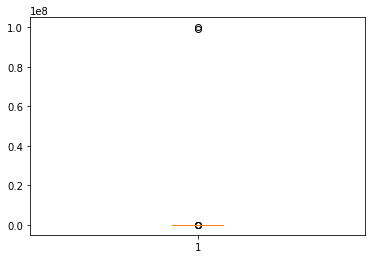

In [36]:
#from Ravi # check how many outliers are present
###########to check number of outliers in each columns
from pylab import *
rrg2 = boxplot(data_r.x2)
top_points_r= rrg2["fliers"][0].get_data()[1]
top_points_r
len(top_points_r)  

In [41]:
from feature_engine.outliers import Winsorizer
windsoriser = Winsorizer(capping_method='iqr', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['x2'])
data_t = windsoriser.fit_transform(data_r[['x2']])

# we can inspect the minimum caps and maximum caps 
windsoriser.left_tail_caps_, windsoriser.right_tail_caps_

({'x2': -295.95026938250004}, {'x2': 279.9788071175})

In [42]:
data_r2=data_r.drop('x2', axis = 1)
data_new = pd.concat([data_r2, data_t], axis =1)
dataset=data_new.iloc[:,[0,2,1]]

{'whiskers': [<matplotlib.lines.Line2D at 0x182b9522040>,
 'caps': [<matplotlib.lines.Line2D at 0x182b9541df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x182b9522e50>],
 'medians': [<matplotlib.lines.Line2D at 0x182b95508e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x182b955ef70>],
 'means': []}

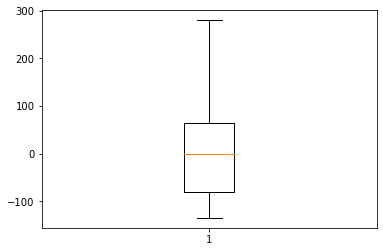

In [43]:
plt.boxplot(dataset.x2)

0

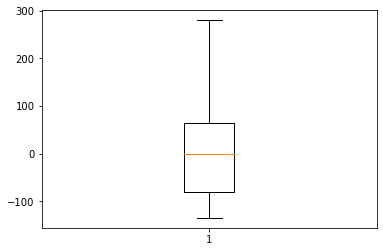

In [44]:
#from Ravi # check how many outliers are present
###########to check number of outliers in each columns
from pylab import *
rrg3 = boxplot(dataset.x2)
top_points_r= rrg3["fliers"][0].get_data()[1]
top_points_r
len(top_points_r)  

<BarContainer object of 2227 artists>

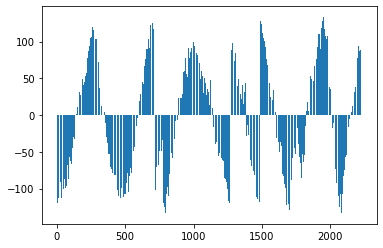

In [45]:
plt.bar(height = dataset.x1, x = np.arange(1, 2228, 1))

<BarContainer object of 2227 artists>

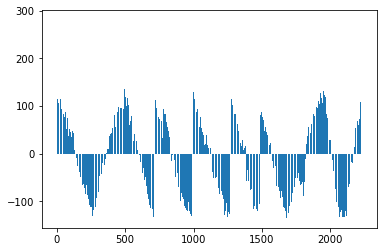

In [46]:
plt.bar(height = dataset.x2, x = np.arange(1, 2228, 1))

(array([181., 276., 284., 236., 197., 157., 285., 250., 209., 152.]),
 array([-1.34369160e+02, -1.07481376e+02, -8.05935909e+01, -5.37058061e+01,
        -2.68180213e+01,  6.97634500e-02,  2.69575482e+01,  5.38453330e+01,
         8.07331178e+01,  1.07620903e+02,  1.34508687e+02]),
 <BarContainer object of 10 artists>)

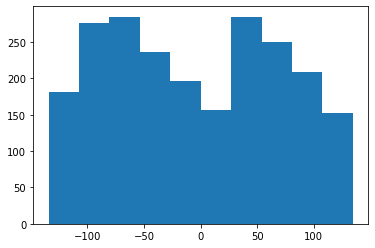

In [47]:
plt.hist(dataset.x1) #histogram

(array([441., 381., 251., 279., 399., 367., 104.,   0.,   0.,   5.]),
 array([-134.8761321 ,  -93.39063818,  -51.90514426,  -10.41965033,
          31.06584359,   72.55133751,  114.03683143,  155.52232535,
         197.00781927,  238.4933132 ,  279.97880712]),
 <BarContainer object of 10 artists>)

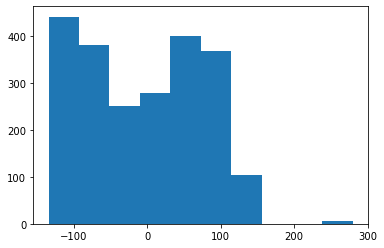

In [48]:
plt.hist(dataset.x2) #histogram

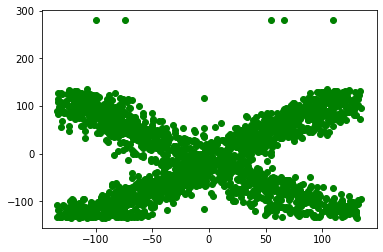

In [49]:
plt.scatter(x = dataset['x1'], y = dataset['x2'], color = 'green') 

In [50]:
np.corrcoef(dataset.x1, dataset.x2) 

array([[1.        , 0.10957814],
       [0.10957814, 1.        ]])

In [52]:
cov_output = np.cov(dataset.x1, dataset.x2)[0, 1]
cov_output

663.6448820203041

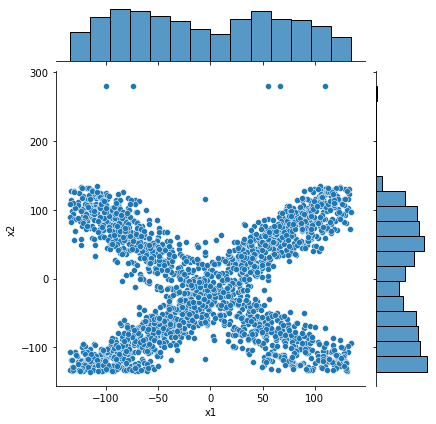

In [53]:
# Jointplot
import seaborn as sns
sns.jointplot(x=dataset['x1'], y=dataset['x2'])



C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

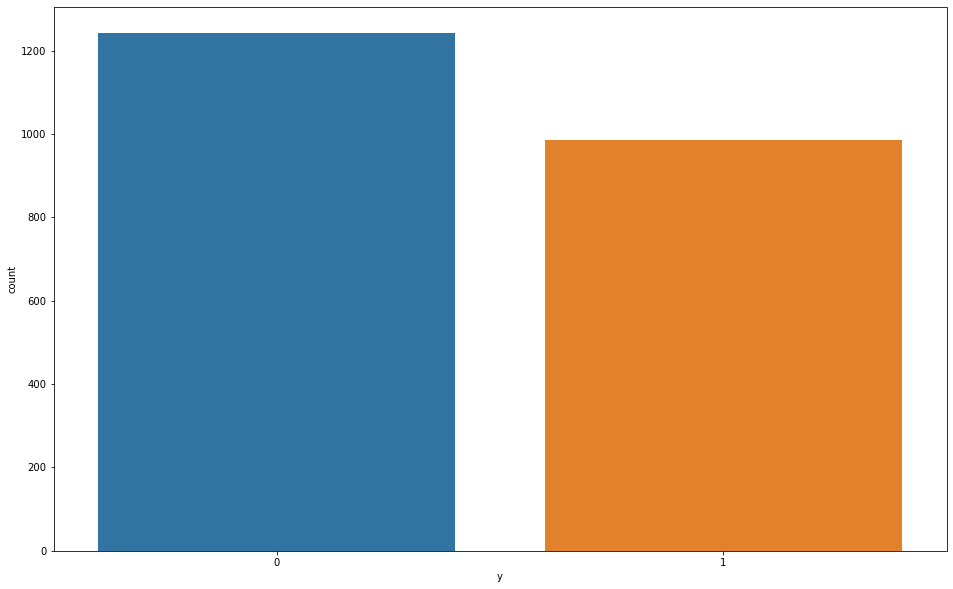

In [54]:
# Countplot
plt.figure(1, figsize=(16, 10))
sns.countplot(dataset['y'])


In [56]:
dataset['y'].unique()


array([1, 0], dtype=int64)

In [57]:
dataset['y'].value_counts()

0    1242
1     985
Name: y, dtype: int64

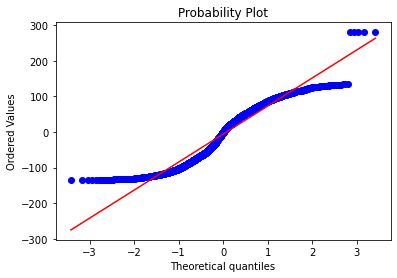

In [61]:
# Q-Q Plot
from scipy import stats
import pylab
stats.probplot(dataset.x2, dist = "norm", plot = pylab)
plt.show()




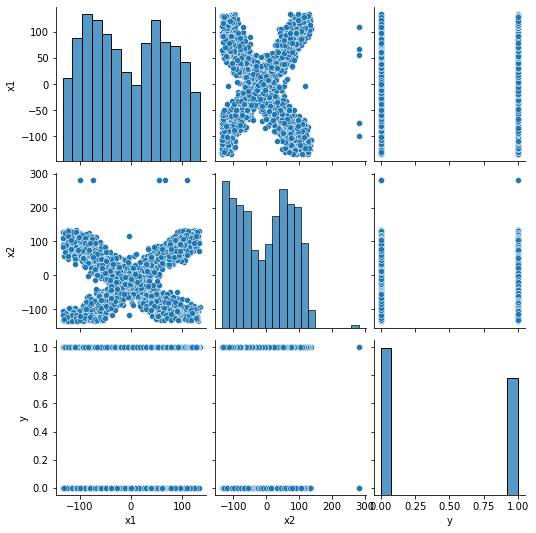

In [62]:
# Scatter plot between the variables along with histograms
import seaborn as sns
sns.pairplot(dataset.iloc[:, :])
                             

In [63]:
# Correlation matrix 
dataset.corr()

,x1,x2,y
x1,1.000000,0.109578,-0.121152
x2,0.109578,1.000000,0.058046
y,-0.121152,0.058046,1.000000


In [128]:
from sklearn.model_selection import train_test_split # train and test 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix


In [68]:
model_logi = LogisticRegression(solver='lbfgs') #solver : {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, default='lbfgs'
model_svm_linear = SVC(kernel = "linear")
model_svm_rbf = SVC(kernel = "rbf")
model_dt = DT(criterion = 'entropy')
model_knn = KNeighborsClassifier(n_neighbors = 21)

In [69]:
train_data, test_data = train_test_split(dataset, test_size = 0.3) # 30% test data

In [70]:
X_train=train_data[['x1','x2']]
Y_train=train_data['y']
X_test=test_data[['x1','x2']]
Y_test=test_data['y']

In [85]:
model_logi=model_logi.fit(X_train,Y_train)
model_svm_linear.fit(X_train,Y_train)
model_svm_rbf.fit(X_train,Y_train)
model_dt.fit(X_train,Y_train)
model_knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=21)

In [91]:
yhat_logi=model_logi.predict(X_test)
yhat_svm_linear= model_svm_linear.predict(X_test)
yhat_svm_rbf=model_svm_rbf.predict(X_test)
yhat_dt=model_dt.predict(X_test)
yhat_knn=model_knn.predict(X_test)

In [92]:
yTrainhat_logi=model_logi.predict(X_train)
yTrainhat_svm_linear= model_svm_linear.predict(X_train)
yTrainhat_svm_rbf=model_svm_rbf.predict(X_train)
yTrainhat_dt=model_dt.predict(X_train)
yTrainhat_knn=model_knn.predict(X_train)

In [93]:
acc_test_logi = metrics.accuracy_score(Y_test, yhat_logi)
acc_test_logi


0.7174887892376681

In [94]:
acc_test_svm_linear = metrics.accuracy_score(Y_test, yhat_svm_linear)
acc_test_svm_linear

0.7055306427503737

In [95]:
acc_test_svm_rbf = metrics.accuracy_score(Y_test, yhat_svm_rbf)
acc_test_svm_rbf

0.9506726457399103

In [96]:
acc_test_dt = metrics.accuracy_score(Y_test,yhat_dt )
acc_test_dt


0.9417040358744395

In [97]:
acc_test_knn = metrics.accuracy_score(Y_test,yhat_knn )
acc_test_knn


0.9596412556053812

In [99]:
train_acc = np.mean(yTrainhat_logi == Y_train)
print(train_acc)
test_acc = np.mean(yhat_logi == Y_test)
print(test_acc)

0.748395378690629
0.7174887892376681


In [100]:
test_accu = {"MODEL":pd.Series(["Logistic","SVM_linear","SVM_rbf","DecisionTree","KNN"]),"Test_accuracy_Values":pd.Series([acc_test_logi,acc_test_svm_linear,acc_test_svm_rbf,acc_test_dt,acc_test_knn])}
table_test_accu=pd.DataFrame(test_accu)
table_test_accu

,MODEL,Test_accuracy_Values
0,Logistic,0.717489
1,SVM_linear,0.705531
2,SVM_rbf,0.950673
3,DecisionTree,0.941704
4,KNN,0.959641


In [ ]:
 #hyperparameter tuning for each model--

In [136]:
#Logistic Regression Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
#making the instance
model=LogisticRegression()
#Hyper Parameters Set
params = {'max_iter': [100,500], 
          'C':[100, 10, 1.0, 0.1, 0.01],
          'solver': ['lbfgs','newton-cg']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,Y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module

#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,Y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,Y_test))

Best Hyper Parameters:
 {'C': 100, 'max_iter': 100, 'solver': 'lbfgs'}
Accuracy: 0.7174887892376681
Confusion Metrix:
 [[356 182]
 [  7 124]]


In [137]:
#SVM Linear Classfication Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = False) #verbose=3
  
# fitting the model for grid search
grid.fit(X_train,Y_train)
print(grid.best_params_)  
print(grid.best_estimator_)

grid_predictions = grid.predict(X_test)
print(classification_report(Y_test, grid_predictions))
confusion_matrix(Y_test,grid_predictions)
accuracy_score(Y_test,grid_predictions)  

KeyboardInterrupt: 

In [ ]:
#SVM rbf Classfication Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = False) #verbose=3
  
# fitting the model for grid search
grid.fit(X_train,Y_train)
print(grid.best_params_)  
print(grid.best_estimator_)

grid_predictions = grid.predict(Y_test)
print(classification_report(Y_test, grid_predictions))
confusion_matrix(Y_test,grid_predictions)
accuracy_score(Y_test,grid_predictions)  

In [126]:
#DT Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#making the instance
model= DecisionTreeClassifier(random_state=1234)
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,Y_train)
#The best hyper parameters set
print("Best Hyper Parameters:",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,Y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,Y_test))

Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 9, 'random_state': 123}
Accuracy: 0.9342301943198804
Confusion Metrix:
 [[335  16]
 [ 28 290]]


In [127]:
#KNN Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':range(3,50,2),
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(X_train,Y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,Y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,Y_test))

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 43, 'weights': 'uniform'}
Accuracy: 0.9491778774289985
Confusion Metrix:
 [[341  12]
 [ 22 294]]


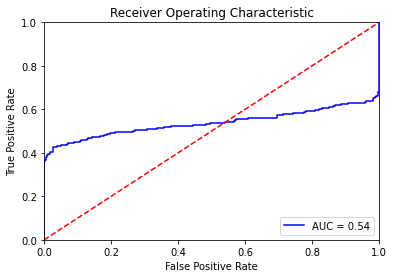

In [118]:
#####################################################################
#####################################################################
#visualise output
lr_probs = model_logi.predict_proba(X_test)
lr_probs2 = lr_probs[:, 1]

fpr, tpr, threshold = metrics.roc_curve(Y_test, lr_probs2)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [105]:
#!pip install scikit-plot

C:\Users\home\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


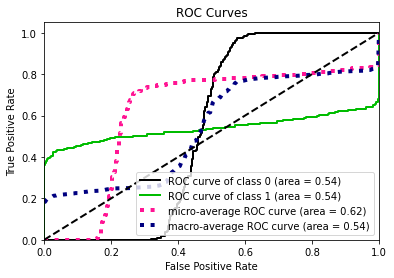

In [119]:
import scikitplot as skplt
import matplotlib.pyplot as plt

#Y_test = # ground truth labels
#lr_probas = # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(Y_test, lr_probs)
plt.show()

In [120]:
#print(lr_probs.size)
print(lr_probs.shape)

(669, 2)


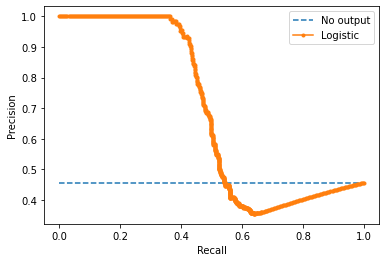

In [122]:
lr_precision, lr_recall, _ = metrics.precision_recall_curve(Y_test, lr_probs2)
no_output = len(Y_test[Y_test==1]) / len(Y_test)
from matplotlib import pyplot
pyplot.plot([0, 1], [no_output, no_output], linestyle='--', label='No output')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
pyplot.show()

In [138]:
table_test_accu

,MODEL,Test_accuracy_Values
0,Logistic,0.717489
1,SVM_linear,0.705531
2,SVM_rbf,0.950673
3,DecisionTree,0.941704
4,KNN,0.959641


In [ ]:
#from above we can see that KNN or SVM with rbf kernel gives high accuracy